# Callback functions
### A callback function, also known simply as a `callback,` is a function that is passed as an argument to another function and is intended to be executed after the completion of that function or at a specific event or condition.

Lets put the previous code in a function called getData to make it reusable.

In [ ]:
const getData = (callback) => {
    const request = new XMLHttpRequest();

    request.addEventListener('readystatechange', () => {
        if (request.readyState === 4 && request.status === 200) {
            callback(undefined, request.responseText);
        }
        else if (request.readyState === 4) {

            callback('could not fetch the data.', undefined);
        }
    })
    request.open('GET', 'https://jsonplaceholder.typicode.com/todos/')
    request.send(); }


    getData((err, data) => {
        if (err) {
            console.log(err);
        }
        else {
            console.log('Response Data:\n',data);
        }
    })

Let's break down the code step by step:

1. **Function `getData(callback)`:**
   - This function takes a single argument, `callback`, which is expected to be a function.
   - Inside the function, a new `XMLHttpRequest` object called `request` is created. This object is used to make HTTP requests.

2. **Event Listener for `readystatechange`:**
   - An event listener is added to the `request` object for the `readystatechange` event. This event is fired whenever the `readyState` property of the request changes, indicating a change in the request's status.
   - Inside the event listener, there is a conditional statement that checks if the `readyState` is 4 (indicating that the request has completed) and if the `status` is 200 (indicating a successful HTTP response).
   - If both conditions are met, it calls the `callback` function with `undefined` as the first argument (indicating no error) and the response text as the second argument.

3. **Error Handling in the Event Listener:**
   - If the `readyState` is 4 (indicating the request has completed) but the `status` is not 200 (indicating an error in the HTTP response), it calls the `callback` function with an error message string as the first argument and `undefined` as the second argument.

4. **Opening and Sending the Request:**
   - Before sending the request, the `request` object is configured using the `open` method, specifying the HTTP method (GET) and the URL to fetch data from.
   - Finally, the `send` method is called to initiate the HTTP request.

5. **Invoking `getData` Function:**
   - After defining the `getData` function, it is invoked with a callback function as an argument.
   - The callback function takes two parameters, `err` and `data`, which will be populated based on the success or failure of the HTTP request.
   - Inside the callback function, there is conditional logic to check if an error occurred (`err` is not `undefined`) or if the request was successful.
   - If there's an error, it logs the error message.
   - If the request was successful, it logs the response data.

Here's a summary of what happens:
- The `getData` function is called with a callback.
- It makes an HTTP GET request.
- When the request completes, the callback is called with either an error message or the response data.
- The code inside the callback function handles the error or processes the response data accordingly.

out:
Fail <br>
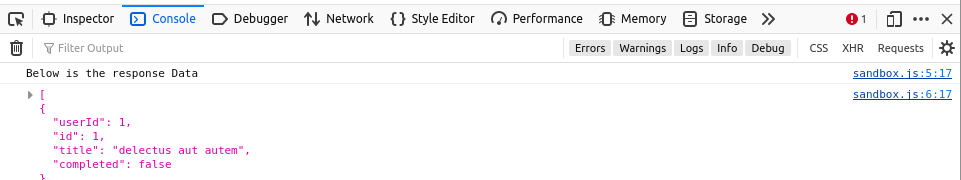
Success:<br>
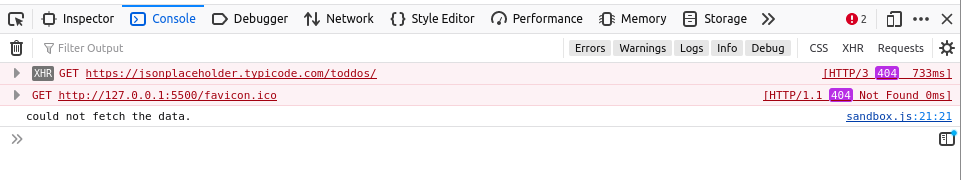

# Asynchronus code in a nutshell

In [ ]:
    console.log(1)
    console.log(3)


    getData((err, data) => {
        if (err) {
            console.log(err);
        }
        else {
            console.log('Response Data:\n',data);
        }

    })

    console.log(3)
    console.log(4)


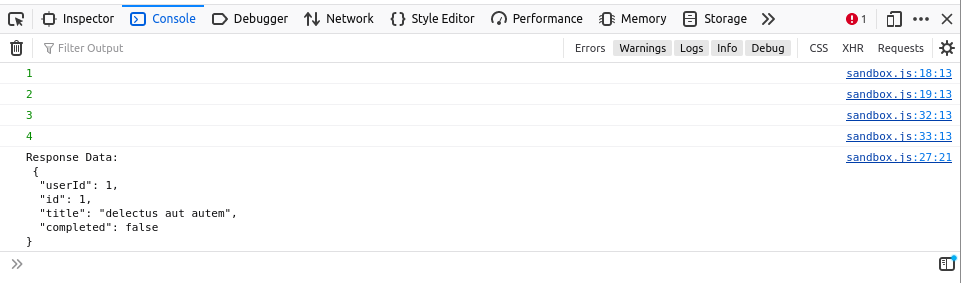

explanation of what happens and why you see the output "1, 2, 3, 4, data":

1. `console.log(1)` and `console.log(2)` execute synchronously, so you see "1" and "3" in the console.

2. `getData(...)` initiates an asynchronous operation (an HTTP request), but it doesn't block the code execution. It registers a callback to be executed when the operation is done.

3. `console.log(3)` and `console.log(4)` execute immediately after the previous `console.log`, so you see "3" and "4" in the console.

4. At some point in the future, when the HTTP request completes, the callback is executed. If there's an error, it logs the error; otherwise, it logs "Response Data:\n" and the actual data received.

So, the order of events in the console is "1, 2, 3, 4" for the synchronous operations and "data" (or an error message) for the asynchronous operation. The asynchronous operation doesn't block the execution of the code, which is why you see the numbers before the data.